In [1]:
from pprint import pprint

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Set Seaborn theme and default palette
sns.set_context("talk")
sns.set_theme(font_scale=1.25, style="whitegrid")
sns.set_palette("deep", desat=0.85, color_codes=True)

# Turn on inline plotting
%matplotlib inline

# Load Black auto-formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import my modules
from tools import plotting
from tools.sklearn.vectorizers import FreqVectorizer

FIT_MODEL = True

# Set my default MPL settings
plt.rcParams.update(plotting.MPL_DEFAULTS)

# Enable automatic reloading
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


# Modeling
## Loading the Data

In [3]:
# Load training data
df = pd.read_parquet("data/model_data", engine="pyarrow")

# Shuffle for good measure
df = df.sample(frac=1, random_state=68)

df.head()

text  \
asin                                                            
B000FQFC4S  chicago_cutlery metropolitan pc_set metropolit...   
B01F8GU532  brand_new idle_air control_valve iac ford_oem ...   
B00O9WDEJO  uxcell screw type furniture level foot adjuste...   
B000P1OZ2S  plug_play video paintball trainer game hasbro ...   
B00FPTGT9C  five_ocean windshield hatch adjuster stainless...   

                                                        title  \
asin                                                            
B000FQFC4S            chicago cutlery metropolitan 10-pc. set   
B01F8GU532  brand new idle air control valve iac for 2001-...   
B00O9WDEJO  uxcell screw on type furniture leveling foot a...   
B000P1OZ2S  plug & play video paintball trainer game by ha...   
B00FPTGT9C  five oceans windshield hatch adjuster, stainle...   

                      brand           main_cat  
asin                                            
B000FQFC4S  chicago_cutlery        amazon home  
B01F8GU532  aip_electronics         automotive  
B00O9WDEJO           uxcell        amazon home  
B000P1OZ2S           hasbro       toys & games  
B00FPTGT9C      five_oceans  sports & outdoors

<IPython.core.display.Javascript object>

In [4]:
X = df.loc[:, "text"]
y = df.loc[:, "main_cat"]

X.shape, y.shape

((1072953,), (1072953,))

<IPython.core.display.Javascript object>

In [5]:
pipe = joblib.load("models/svm_3.joblib")
pipe

Pipeline(steps=[('vec',
                 TfidfVectorizer(binary=True, lowercase=False,
                                 token_pattern='\\S+')),
                ('cls',
                 SGDClassifier(alpha=5.25503769545935e-07, average=True,
                               class_weight='balanced', eta0=0.8416663608926325,
                               learning_rate='adaptive', n_jobs=-1))],
         verbose=True)

<IPython.core.display.Javascript object>

In [6]:
def extract_coef(
    pipeline, classifier="cls", vectorizer="vec",
):
    """Returns labeled model coefficients as a DataFrame."""
    columns = np.array(pipeline[vectorizer].get_feature_names())
    coef = pd.DataFrame(
        pipeline[classifier].coef_,
        index=pipeline[classifier].classes_,
        columns=columns,
    ).T
    return coef

<IPython.core.display.Javascript object>

## Refitting the Model

Next I refit the model on the full `X`.

In [7]:
if FIT_MODEL:
    # Train on full X
    pipe.fit(X, y)
    joblib.dump(pipe, "models/final_refit.joblib", compress=True)

else:
    # Load the saved model
    pipe = joblib.load("models/final_refit.joblib")
pipe

[Pipeline] ............... (step 1 of 2) Processing vec, total= 1.2min
[Pipeline] ............... (step 2 of 2) Processing cls, total=11.5min


Pipeline(steps=[('vec',
                 TfidfVectorizer(binary=True, lowercase=False,
                                 token_pattern='\\S+')),
                ('cls',
                 SGDClassifier(alpha=5.25503769545935e-07, average=True,
                               class_weight='balanced', eta0=0.8416663608926325,
                               learning_rate='adaptive', n_jobs=-1))],
         verbose=True)

<IPython.core.display.Javascript object>

In [8]:
len(pipe["vec"].get_feature_names())

630690

<IPython.core.display.Javascript object>

In [9]:
coef = extract_coef(pipe)
coef = coef.sort_values("video games", ascending=False)
coef.head(10)

all beauty  all electronics  amazon devices  \
cta_digital                 -0.109098        -1.830668       -0.518155   
ubisoft                     -0.157658        -0.478392        0.000000   
activision                  -0.023207        -0.366007       -0.069178   
electronic_art              -0.019510        -0.776470       -0.014756   
mad_catz                     0.000000        -1.706963       -0.007122   
atari                       -0.150183        -0.674613        0.000000   
sega                        -0.170719        -0.373544        0.000000   
nintendo                    -0.474372        -1.618456       -0.773318   
thq                         -0.100902        -0.360792        0.000000   
disney_interactive_studio    0.000000        -0.221558        0.000000   

                           amazon fashion  amazon home  appliances  \
cta_digital                     -0.016414    -0.740232    0.000000   
ubisoft                         -0.112483    -0.409712    0.000000   
activision                      -0.150392    -0.100683   -0.006334   
electronic_art                  -0.159970    -1.260183   -0.094801   
mad_catz                         0.000000    -0.352502    0.000000   
atari                           -0.056178    -0.182777   -0.017805   
sega                             0.014898    -0.117866   -0.006113   
nintendo                        -0.348476    -0.471761   -0.013599   
thq                             -0.038700    -0.031179    0.000000   
disney_interactive_studio       -0.032195    -0.190550    0.000000   

                           arts, crafts & sewing  automotive      baby  \
cta_digital                            -0.093090   -0.573435  0.000000   
ubisoft                                -0.078417   -0.198749 -0.011963   
activision                             -0.007086   -0.315203 -0.045601   
electronic_art                          0.000000   -0.274185 -0.009671   
mad_catz                               -0.046442   -0.101969  0.000000   
atari                                  -0.032120   -0.210781  0.000000   
sega                                   -0.081317   -0.015499 -0.103996   
nintendo                               -0.034091   -0.226581 -0.173419   
thq                                     0.000000   -0.393017 -0.078253   
disney_interactive_studio               0.000000   -0.007817 -0.091238   

                              books  ...  musical instruments  \
cta_digital                0.000000  ...            -0.895985   
ubisoft                   -2.354321  ...            -0.370296   
activision                -2.305746  ...            -0.722595   
electronic_art            -2.308797  ...            -0.018511   
mad_catz                   0.000000  ...            -2.395808   
atari                     -1.511870  ...            -0.173844   
sega                      -1.858075  ...            -0.274681   
nintendo                  -1.348565  ...            -0.623040   
thq                       -1.929402  ...            -0.188207   
disney_interactive_studio -0.658019  ...            -0.083691   

                           office products  pet supplies  \
cta_digital                      -0.411403     -0.050892   
ubisoft                          -0.202896     -0.395274   
activision                       -0.098204     -0.543527   
electronic_art                   -0.273366     -0.559256   
mad_catz                         -0.038452      0.000000   
atari                            -0.003945     -0.009760   
sega                             -0.115152     -0.054733   
nintendo                         -0.410986     -0.196610   
thq                               0.000000     -1.056583   
disney_interactive_studio         0.000000      0.000000   

                           portable audio & accessories  prime pantry  \
cta_digital                                   -0.259213     -0.014837   
ubisoft                                        0.000000     -0.019048   
activision                    

<IPython.core.display.Javascript object>

In [10]:
coef.columns = coef.columns.str.title()
coef.head()

All Beauty  All Electronics  Amazon Devices  Amazon Fashion  \
cta_digital      -0.109098        -1.830668       -0.518155       -0.016414   
ubisoft          -0.157658        -0.478392        0.000000       -0.112483   
activision       -0.023207        -0.366007       -0.069178       -0.150392   
electronic_art   -0.019510        -0.776470       -0.014756       -0.159970   
mad_catz          0.000000        -1.706963       -0.007122        0.000000   

                Amazon Home  Appliances  Arts, Crafts & Sewing  Automotive  \
cta_digital       -0.740232    0.000000              -0.093090   -0.573435   
ubisoft           -0.409712    0.000000              -0.078417   -0.198749   
activision        -0.100683   -0.006334              -0.007086   -0.315203   
electronic_art    -1.260183   -0.094801               0.000000   -0.274185   
mad_catz          -0.352502    0.000000              -0.046442   -0.101969   

                    Baby     Books  ...  Musical Instruments  Office Products  \
cta_digital     0.000000  0.000000  ...            -0.895985        -0.411403   
ubisoft        -0.011963 -2.354321  ...            -0.370296        -0.202896   
activision     -0.045601 -2.305746  ...            -0.722595        -0.098204   
electronic_art -0.009671 -2.308797  ...            -0.018511        -0.273366   
mad_catz        0.000000  0.000000  ...            -2.395808        -0.038452   

                Pet Supplies  Portable Audio & Accessories  Prime Pantry  \
cta_digital        -0.050892                     -0.259213     -0.014837   
ubisoft            -0.395274                      0.000000     -0.019048   
activision         -0.543527                     -0.007783      0.000000   
electronic_art     -0.559256                     -0.015652     -0.004900   
mad_catz            0.000000                     -0.093711      0.000000   

                Software  Sports & Outdoors  Tools & Home Improvement  \
cta_digital     0.000000          -1.771788                 -0.530786   
ubisoft        -2.657557          -0.742889                 -0.090183   
activision     -2.000817          -2.499874                 -0.322569   
electronic_art -2.105969          -1.974294                 -0.241780   
mad_catz       -0.171272          -1.324501                 -0.166036   

                Toys & Games  Video Games  
cta_digital        -0.447547     9.626476  
ubisoft            -3.078250     9.608413  
activision         -4.086539     9.306403  
electronic_art     -4.700777     9.303770  
mad_catz           -0.823412     9.019827  

[5 rows x 36 columns]

<IPython.core.display.Javascript object>

In [11]:
rng = np.random.default_rng(55)

cmaps = [
    "Purples",
    "Blues",
    "Greens",
    "Oranges",
    "Reds",
    "YlOrBr",
    "YlOrRd",
    "OrRd",
    "PuRd",
    "RdPu",
    "BuPu",
    "GnBu",
    "PuBu",
    "YlGnBu",
    "PuBuGn",
    "BuGn",
    "YlGn",
]
cmaps = rng.choice(cmaps, coef.columns.size).tolist()
cmaps

['YlGn',
 'PuBuGn',
 'PuBu',
 'PuBuGn',
 'Oranges',
 'Oranges',
 'YlGnBu',
 'Oranges',
 'BuPu',
 'PuRd',
 'YlOrBr',
 'PuBu',
 'PuRd',
 'GnBu',
 'Blues',
 'YlGn',
 'YlGnBu',
 'Blues',
 'GnBu',
 'PuRd',
 'YlOrRd',
 'YlOrBr',
 'YlOrRd',
 'BuPu',
 'Purples',
 'Purples',
 'OrRd',
 'YlOrBr',
 'GnBu',
 'Blues',
 'PuRd',
 'YlGn',
 'YlGn',
 'BuPu',
 'Reds',
 'PuRd']

<IPython.core.display.Javascript object>

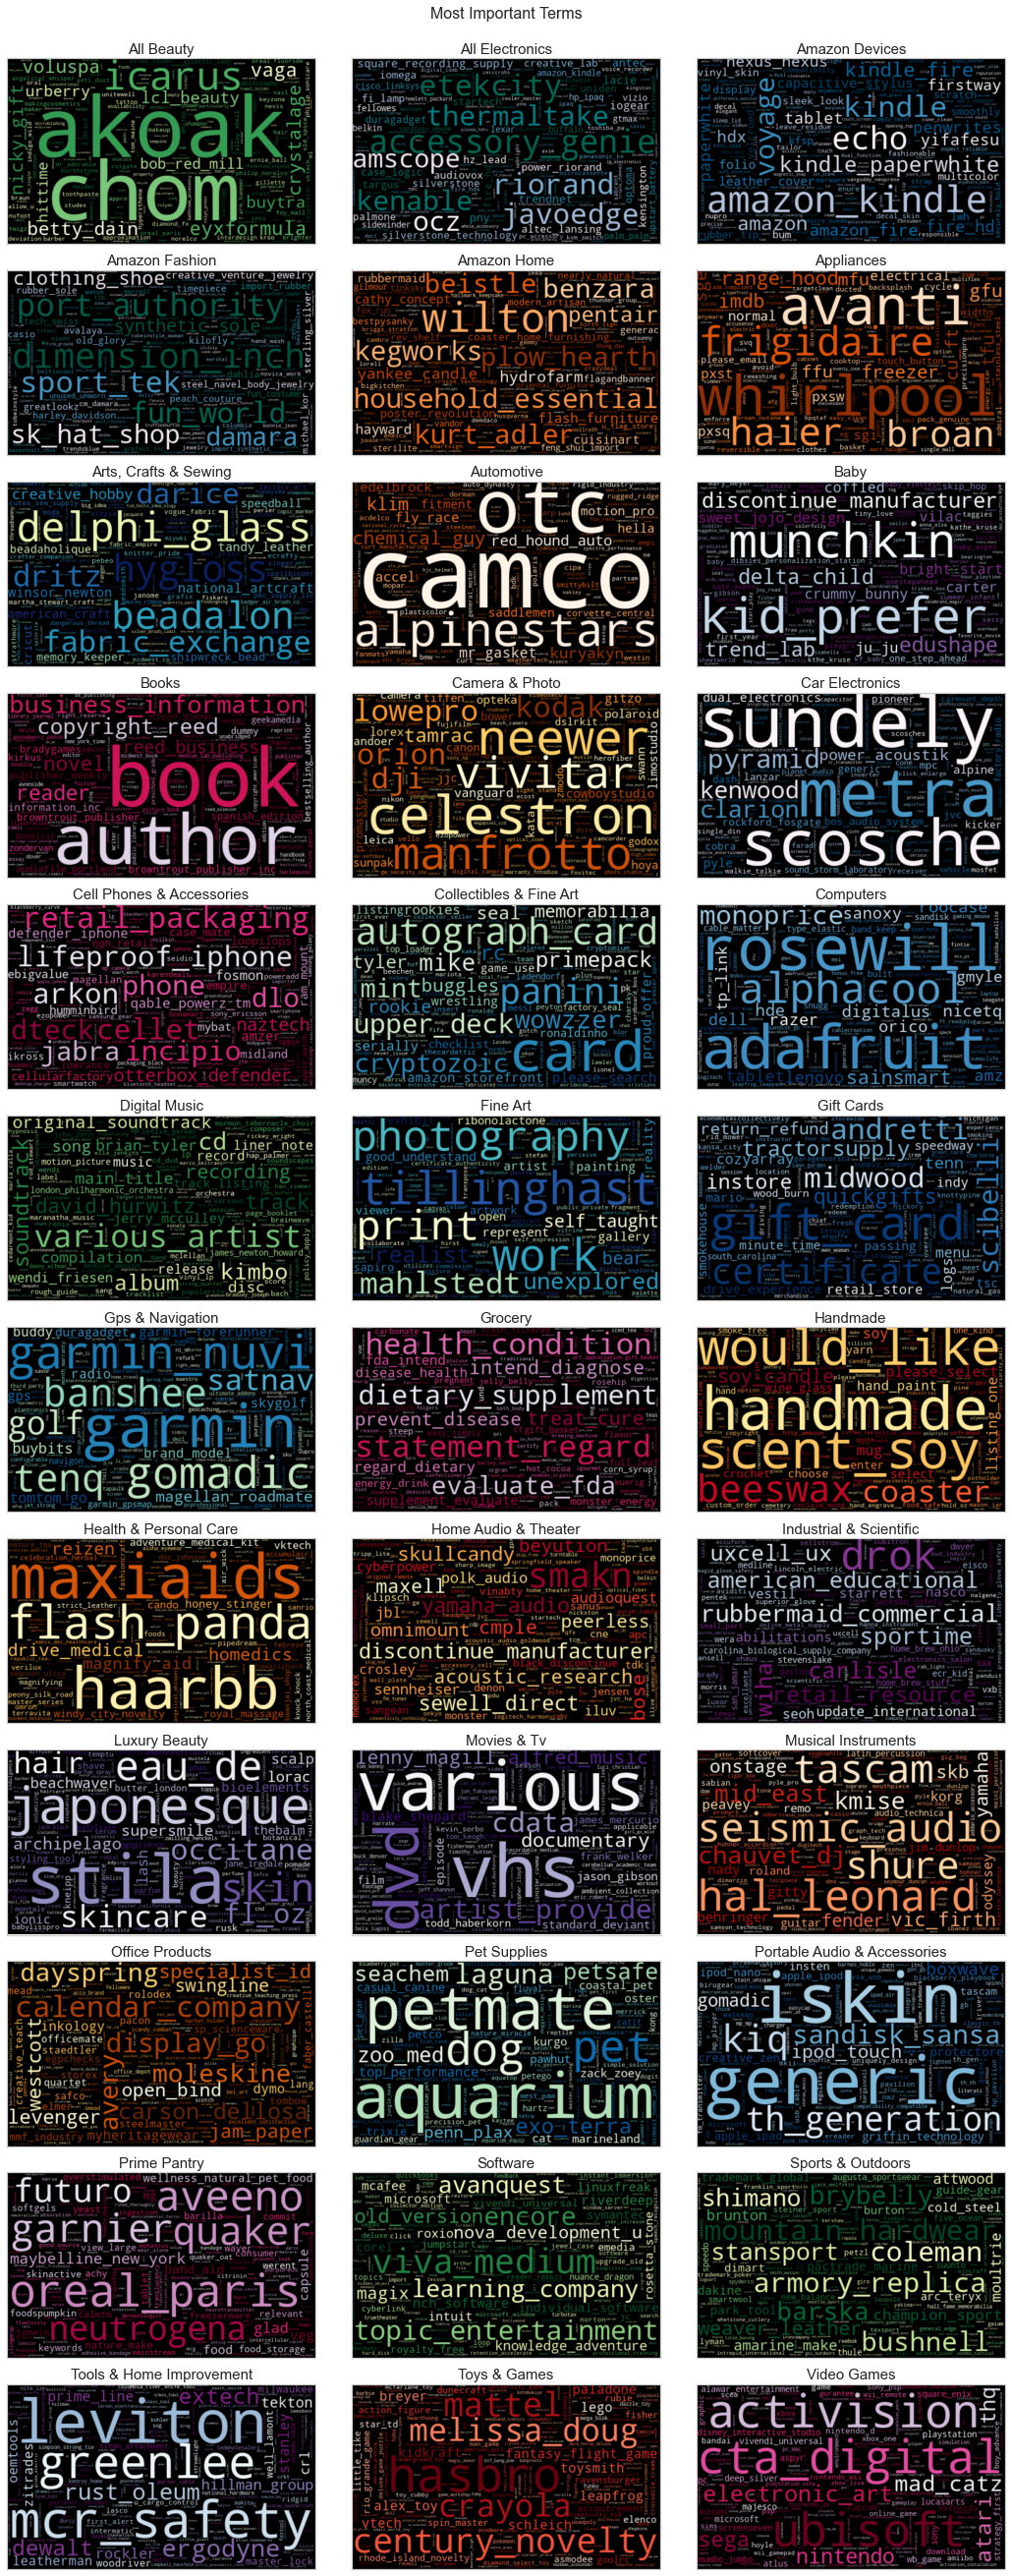

<IPython.core.display.Javascript object>

In [12]:
fig = plotting.wordcloud(coef, cmap=cmaps,)
fig.suptitle("Most Important Terms", y=1.01, fontsize=16)
fig.savefig("figures/final_refit_coef.svg", bbox_inches="tight")

In [13]:
ngrams = [tuple(w.split("_")) for w in pipe["vec"].vocabulary_.keys() if "_" in w]
max(map(len, ngrams))

6

<IPython.core.display.Javascript object>

In [14]:
if not isinstance(pipe.steps[0], FreqVectorizer):
    fv = FreqVectorizer.from_sklearn(pipe["vec"])
    pipe.steps[0] = ("vec", fv)
pipe

Pipeline(steps=[('vec',
                 FreqVectorizer(binary=True, lowercase=False, norm='l2',
                                token_pattern='\\S+', use_idf=True)),
                ('cls',
                 SGDClassifier(alpha=5.25503769545935e-07, average=True,
                               class_weight='balanced', eta0=0.8416663608926325,
                               learning_rate='adaptive', n_jobs=-1))],
         verbose=True)

<IPython.core.display.Javascript object>

In [15]:
stop_words = set(pd.read_json("canonical_params/stopwords.json", typ="series"))
pprint(stop_words, compact=True)

{'about', 'above', 'additional', 'address', 'addresses', 'after', 'again',
 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'apo', 'are', 'aren', 'as',
 'asin', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'best',
 'between', 'both', 'but', 'buy', 'by', 'can', 'cash', 'com', 'couldn',
 'customer', 'deal', 'deliver', 'delivered', 'delivery', 'detail', 'did',
 'didn', 'dimensions', 'discontinued', 'do', 'does', 'doesn', 'doing', 'don',
 'down', 'during', 'each', 'eligible', 'feature', 'few', 'for', 'fpo', 'from',
 'further', 'guarantee', 'had', 'hadn', 'has', 'hasn', 'have', 'haven',
 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his',
 'how', 'if', 'in', 'into', 'is', 'isn', 'it', 'item', 'its', 'itself', 'just',
 'listed', 'll', 'ma', 'me', 'mightn', 'money', 'more', 'most', 'mustn', 'my',
 'myself', 'na', 'needn', 'no', 'none', 'nor', 'not', 'now', 'of', 'off', 'on',
 'once', 'only', 'or', 'other', 'ounce', 'ounces', 'our', 'ours', 'ourselves',


<IPython.core.display.Javascript object>

In [16]:
pipe["vec"].set_params(
    lowercase=True,
    stop_words=stop_words,
    strip_accents="ascii",
    strip_html_tags=True,
    strip_punct="_",
    uniq_char_thresh=0.375,
    stemmer="wordnet",
    token_pattern="(?i)\\b[a-z_]{2,16}\\b",
    ngram_range=(1, 6),
)

FreqVectorizer(binary=True, ngram_range=(1, 6), norm='l2', stemmer='wordnet',
               stop_words={'about', 'above', 'additional', 'address',
                           'addresses', 'after', 'again', 'against', 'ain',
                           'all', 'am', 'an', 'and', 'any', 'apo', 'are',
                           'aren', 'as', 'asin', 'at', 'be', 'because', 'been',
                           'before', 'being', 'below', 'best', 'between',
                           'both', 'but', ...},
               strip_accents='ascii', strip_html_tags=True, strip_punct='_',
               token_pattern='(?i)\\b[a-z_]{2,16}\\b', uniq_char_thresh=0.375,
               use_idf=True)

<IPython.core.display.Javascript object>

In [17]:
pipe

Pipeline(steps=[('vec',
                 FreqVectorizer(binary=True, ngram_range=(1, 6), norm='l2',
                                stemmer='wordnet',
                                stop_words={'about', 'above', 'additional',
                                            'address', 'addresses', 'after',
                                            'again', 'against', 'ain', 'all',
                                            'am', 'an', 'and', 'any', 'apo',
                                            'are', 'aren', 'as', 'asin', 'at',
                                            'be', 'because', 'been', 'before',
                                            'being', 'below', 'best', 'between',
                                            'both', 'but', ...},
                                strip_accents='ascii', strip_html_tags=True,
                                strip_punct='_',
                                token_pattern='(?i)\\b[a-z_]{2,16}\\b',
                                uniq_ch

<IPython.core.display.Javascript object>

In [19]:
joblib.dump(pipe, "models/final_deploy.joblib", compress=("lz4", 3))

['models/final_deploy.joblib']

<IPython.core.display.Javascript object>